In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import random
random.seed(7)
from collections import Counter

In [2]:
starting_line = {(3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0)}
finishing_line = {(16, 26), (16, 27), (16, 28), (16, 29), (16, 30), (16, 31)}
track = {
    (3,1), (4,1), (5,1), (6,1), (7,1), (8,1),
    (3,2), (4,2), (5,2), (6,2), (7,2), (8,2),
    (2,3), (3,3), (4,3), (5,3), (6,3), (7,3), (8,3),
    (2,4), (3,4), (4,4), (5,4), (6,4), (7,4), (8,4),
    (2,5), (3,5), (4,5), (5,5), (6,5), (7,5), (8,5),
    (2,6), (3,6), (4,6), (5,6), (6,6), (7,6), (8,6),
    (2,7), (3,7), (4,7), (5,7), (6,7), (7,7), (8,7),
    (2,8), (3,8), (4,8), (5,8), (6,8), (7,8), (8,8),
    (2,9), (3,9), (4,9), (5,9), (6,9), (7,9), (8,9),
    (1,10), (2,10), (3,10), (4,10), (5,10), (6,10), (7,10), (8,10),
    (1,11), (2,11), (3,11), (4,11), (5,11), (6,11), (7,11), (8,11),
    (1,12), (2,12), (3,12), (4,12), (5,12), (6,12), (7,12), (8,12),
    (1,13), (2,13), (3,13), (4,13), (5,13), (6,13), (7,13), (8,13),
    (1,14), (2,14), (3,14), (4,14), (5,14), (6,14), (7,14), (8,14),
    (1,15), (2,15), (3,15), (4,15), (5,15), (6,15), (7,15), (8,15),
    (1,16), (2,16), (3,16), (4,16), (5,16), (6,16), (7,16), (8,16),
    (1,17), (2,17), (3,17), (4,17), (5,17), (6,17), (7,17), (8,17),
    (0,18), (1,18), (2,18), (3,18), (4,18), (5,18), (6,18), (7,18), (8,18),
    (0,19), (1,19), (2,19), (3,19), (4,19), (5,19), (6,19), (7,19), (8,19),
    (0,20), (1,20), (2,20), (3,20), (4,20), (5,20), (6,20), (7,20), (8,20),
    (0,21), (1,21), (2,21), (3,21), (4,21), (5,21), (6,21), (7,21), (8,21),
    (0,22), (1,22), (2,22), (3,22), (4,22), (5,22), (6,22), (7,22), (8,22),
    (0,23), (1,23), (2,23), (3,23), (4,23), (5,23), (6,23), (7,23), (8,23),
    (0,24), (1,24), (2,24), (3,24), (4,24), (5,24), (6,24), (7,24), (8,24),
    (0,25), (1,25), (2,25), (3,25), (4,25), (5,25), (6,25), (7,25), (8,25), (9,25),
    (0,26), (1,26), (2,26), (3,26), (4,26), (5,26), (6,26), (7,26), (8,26), (9,26), (10,26), (11,26), (12,26), (13,26), (14,26), (15,26),
    (0,27), (1,27), (2,27), (3,27), (4,27), (5,27), (6,27), (7,27), (8,27), (9,27), (10,27), (11,27), (12,27), (13,27), (14,27), (15,27),
    (1,28), (2,28), (3,28), (4,28), (5,28), (6,28), (7,28), (8,28), (9,28), (10,28), (11,28), (12,28), (13,28), (14,28), (15,28),
    (2,29), (3,29), (4,29), (5,29), (6,29), (7,29), (8,29), (9,29), (10,29), (11,29), (12,29), (13,29), (14,29), (15,29),
    (2,30), (3,30), (4,30), (5,30), (6,30), (7,30), (8,30), (9,30), (10,30), (11,30), (12,30), (13,30), (14,30), (15,30),
    (3,31), (4,31), (5,31), (6,31), (7,31), (8,31), (9,31), (10,31), (11,31), (12,31), (13,31), (14,31), (15,31)
}

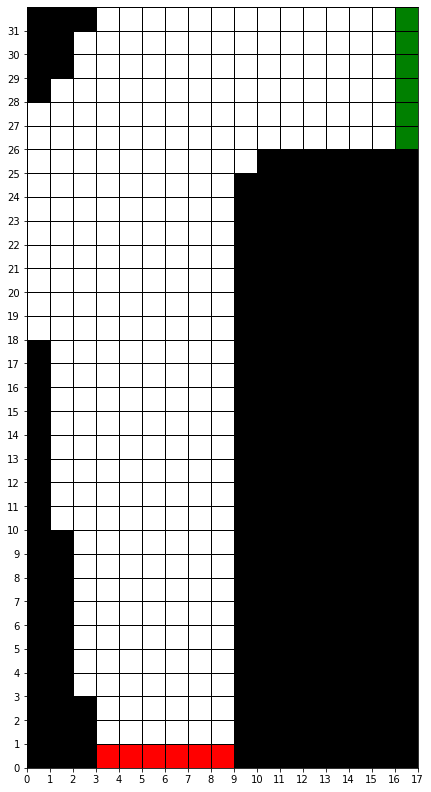

In [3]:
def plot_map():
    data = np.zeros((32, 17))
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            if (j, i) in track:
                data[i, j] = 1
            elif (j, i) in starting_line:
                data[i, j] = 2
            elif(j, i) in finishing_line:
                data[i, j] = 3
    fig, ax = plt.subplots(figsize=(7, 14))
    ax.set_xticks(np.arange(0, 18, 1))
    ax.set_yticks(np.arange(0, 32, 1))
    cmap = colors.ListedColormap(["black", "white", "red", "green"])
    plt.pcolormesh(data, edgecolors="k", cmap=cmap)
plot_map()

In [4]:
def get_available_actions(state):
     available_actions = []
     x, y, v_x, v_y = state
     for v_x_inc in (-1, 0, 1):
          v_x_new = v_x + v_x_inc
          for v_y_inc in (-1, 0, 1):
               v_y_new = v_y + v_y_inc
               if not (v_x_new < 0 or v_y_new < 0 or v_x_new > 5 or v_y_new > 5 or
                    (v_x_new == 0 and v_y_new == 0)):
                    available_actions.append((v_x_inc, v_y_inc))
     return available_actions


In [5]:
state = (5, 0, 0, 0)
get_available_actions(state)

[(0, 1), (1, 0), (1, 1)]

In [6]:
def get_eps_greedy_probabilities(state, greedy_action, eps=0):
    probabilities = {}
    available_actions = get_available_actions(state)
    num_available_actions = len(available_actions)
    for action in available_actions:
        probabilities[action] = eps / num_available_actions
        if action == greedy_action:
            probabilities[action] += 1 - eps
    return probabilities

In [7]:
state = (3, 4, 3, 4)
get_eps_greedy_probabilities(state, random.choice(get_available_actions(state)))

{(-1, -1): 0.0,
 (-1, 0): 0.0,
 (-1, 1): 0.0,
 (0, -1): 0.0,
 (0, 0): 0.0,
 (0, 1): 1.0,
 (1, -1): 0.0,
 (1, 0): 0.0,
 (1, 1): 0.0}

In [8]:
def generate_start_state():
    start_x, start_y = random.choice(list(starting_line))
    return start_x, start_y, 0, 0

In [9]:
generate_start_state()

(5, 0, 0, 0)

In [10]:
def initialize_learning(eps):
    policy = {}
    Q = {}
    N = {}
    for x, y in starting_line.union(track):
        for v_x in range(6):
            for v_y in range(6):
                state = (x, y, v_x, v_y)
                available_actions = get_available_actions(state)
                policy[state] = get_eps_greedy_probabilities(state, random.choice(available_actions), eps)
                for a in available_actions:
                    Q[(state, a)] = 0
                    N[(state, a)] = 0
    return policy, Q, N

In [11]:
policy, Q, N = initialize_learning(0.1)
s = (5, 6, 5, 5)
a = random.choice(list(policy[s].keys()))
print("state s:", str(s), "- policy(s):", str(policy[s]))
print("state-action pair (s, a):", f"({s}, {a})", "- Q(s, a):", Q[(s, a)])
print("state-action pair (s, a):", f"({s}, {a})", "- N(s, a):", N[(s, a)])

state s: (5, 6, 5, 5) - policy(s): {(-1, -1): 0.025, (-1, 0): 0.925, (0, -1): 0.025, (0, 0): 0.025}
state-action pair (s, a): ((5, 6, 5, 5), (0, -1)) - Q(s, a): 0
state-action pair (s, a): ((5, 6, 5, 5), (0, -1)) - N(s, a): 0


In [12]:
def select_action_according_to_policy(policy, state):
    return random.choices(list(policy[state].keys()), list(policy[state].values()))[0]

In [13]:
state = (3, 4, 3, 4)
x = [select_action_according_to_policy(policy, state) for _ in range(100000)]
print(policy[state])
print(Counter(x).keys())
print(Counter(x).values())

{(-1, -1): 0.011111111111111112, (-1, 0): 0.011111111111111112, (-1, 1): 0.011111111111111112, (0, -1): 0.011111111111111112, (0, 0): 0.011111111111111112, (0, 1): 0.011111111111111112, (1, -1): 0.011111111111111112, (1, 0): 0.011111111111111112, (1, 1): 0.9111111111111111}
dict_keys([(1, 1), (-1, 1), (0, 0), (1, 0), (0, -1), (-1, -1), (-1, 0), (1, -1), (0, 1)])
dict_values([91119, 1146, 1080, 1100, 1082, 1123, 1101, 1109, 1140])


In [14]:
def generate_episode(policy, max_num_steps=1000000, noise=0):
    states = []
    actions = []
    rewards = []
    state = generate_start_state()
    for t in range(max_num_steps):
        states.append(state)
        x, y, v_x, v_y = state
        action = select_action_according_to_policy(policy, state)
        actions.append(action)
        if random.random() < noise:
            action = (0, 0)
        new_v_x = v_x + action[0]
        new_v_y = v_y + action[1]
        new_x = x + new_v_x
        new_y = y + new_v_y
        state = (new_x, new_y, new_v_x, new_v_y)
        if new_x >= 16 and new_y >= 26 and new_y <= 31:
            # Crossed finishing line
            rewards.append(0)
            break
        elif (new_x, new_y) not in starting_line.union(track):
            # Ran out of bounds
            state = generate_start_state()
        rewards.append(-1)
    return states, actions, rewards

In [15]:
states, actions, rewards = generate_episode(policy, max_num_steps=10)
print(states)
print(actions)
print(rewards)

[(6, 0, 0, 0), (7, 1, 1, 1), (3, 0, 0, 0), (3, 1, 0, 1), (3, 2, 0, 1), (4, 4, 1, 2), (4, 6, 0, 2), (5, 9, 1, 3), (7, 13, 2, 4), (8, 18, 1, 5)]
[(1, 1), (1, 1), (0, 1), (0, 0), (1, 1), (-1, 0), (1, 1), (1, 1), (-1, 1), (-1, 0)]
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


In [16]:
def plot_trajectory(states):
    plot_map()
    x = []
    y = []
    for i in range(len(states)):
        x.append(states[i][0])
        y.append(states[i][1])
    plt.plot(x, y, "-o")

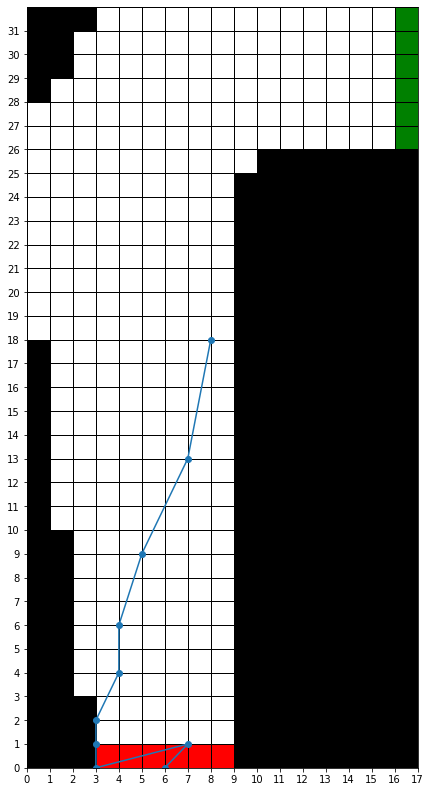

In [17]:
plot_trajectory(states)

In [18]:
def get_greedy_action(Q, state):
    max_val = -np.inf
    greedy_action = None
    for action in get_available_actions(state):
        if Q[(state, action)] > max_val:
            max_val = Q[(state, action)]
            greedy_action = action
    return greedy_action

In [19]:
# On-policy every visit MC control (eps-soft policies)
def learn_from_episode(policy, Q, N, states, actions, rewards, gamma=1, eps=0.1):
    G = 0
    for t in range(len(states) - 1, -1, -1):
        G = gamma * G + rewards[t]
        s = states[t]
        a = actions[t]
        N[(s, a)] += 1
        Q[(s, a)] += (G - Q[(s, a)]) / N[(s, a)]
        policy[s] = get_eps_greedy_probabilities(s, get_greedy_action(Q, s), eps)
    return policy, Q, N

In [20]:
policy, Q, N = learn_from_episode(policy, Q, N, states, actions, rewards)

In [21]:
Q[(states[0], actions[0])]

-10.0

In [22]:
# Learn from many episodes
num_episodes = 10000
policy, Q, N = initialize_learning(1)
for ep in range(num_episodes):
    states, actions, rewards = generate_episode(policy, noise=0.0) # TODO: Add noise
    eps = (num_episodes - ep) / num_episodes
    policy, Q, N = learn_from_episode(policy, Q, N, states, actions, rewards, eps=eps)

KeyboardInterrupt: 

In [ ]:
len(N.values())

In [ ]:
np.sum(np.array(list(N.values())) != 0)

In [ ]:
states, actions, rewards = generate_episode(policy)
plot_trajectory(states)

In [1]:
from skimage.draw import line

ModuleNotFoundError: No module named 'skimage'